In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c94e80cd-e996-4c04-8f0c-143a95eaf2ef',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [7]:
type(data)

dict

In [93]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [150]:
# Normalize the data

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9801,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19189637.00000,19189637.00000,NaN,1,NaN,NaN,None,2022-10-26T09:28:00.000Z,20616.15466,61306092291.36499,134.22350,1.45845,6.88150,7.28802,7.35496,2.12934,-9.97660,395616524171.97534,39.81070,432939247762.28998,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03.049953
1,1027,Ethereum,ETH,ethereum,6152,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373863.49900,122373863.49900,NaN,2,NaN,NaN,None,2022-10-26T09:28:00.000Z,1532.94006,38476040845.72713,236.72990,1.35266,13.84339,17.67355,16.42036,2.18414,-5.10427,187591797313.26035,18.86860,187591797313.26001,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03.049953
2,825,Tether,USDT,tether,41254,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68513908026.83196,71141766321.77811,NaN,3,NaN,NaN,None,2022-10-26T09:28:00.000Z,1.00021,82635758742.22229,129.83610,-0.00064,0.01688,0.00715,0.01433,0.01191,0.00091,68528031904.91403,6.89540,71156431922.72000,None,2022-10-26T09:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-26 17:53:03.049953
3,1839,BNB,BNB,bnb,1130,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159979781.55932,159979963.59043,NaN,4,NaN,NaN,None,2022-10-26T09:28:00.000Z,288.77771,1056787249.58205,100.32470,0.73506,5.82477,6.33070,4.94592,2.82187,8.40087,46198595181.57749,4.64860,57755542270.76000,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03.049953
4,3408,USD Coin,USDC,usd-coin,6593,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43797801994.60848,43797801994.60848,NaN,5,NaN,NaN,None,2022-10-26T09:28:00.000Z,1.00010,5394135557.94068,98.41660,0.01405,0.00861,0.00143,0.00401,0.00969,0.02298,43802080761.89925,4.40630,43802080761.90000,None,2022-10-26T09:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-26 17:53:03.049953
5,52,XRP,XRP,xrp,828,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50085407159.00000,99989240406.00000,NaN,6,NaN,NaN,None,2022-10-26T09:28:00.000Z,0.46571,1658941834.49386,35.37110,0.78997,4.19229,1.86051,-2.08908,39.18411,30.84298,23325330478.86381,2.34640,46571110832.37000,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03.049953
6,4687,Binance USD,BUSD,binance-usd,5329,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,None,2022-10-26T09:28:00.000Z,1.00005,9655628812.76113,102.32030,-0.03858,0.02865,-0.02399,0.00426,-0.00912,0.10555,21629113777.58333,2.17580,21629113777.58000,None,2022-10-26T09:28:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-26 17:53:03.049953
7,2010,Cardano,ADA,cardano,584,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34312245656.54400,35063885650.25700,NaN,8,NaN,NaN,None,2022-10-26T09:28:00.000Z,0.40487,1426583526.21945,291.16520,1.01831,12.73571,13.20192,-9.52765,-7.90195,-18.92813,13891965884.09745,1.39750,18219106701.49000,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03

In [151]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c94e80cd-e996-4c04-8f0c-143a95eaf2ef',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.Timestamp('now')
    df = pd.concat([df,df2])
    
# Pulling into CSV

    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.Timestamp('now')
    #df
    
    #if not os.path.isfile(r'C:\Users\Charalampos\Documents\Python Scripts\APi.csv'):
        #df.to_csv(r'C:\Users\Charalampos\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\Charalampos\Documents\Python Scripts\API.csv', mode='a', header=False)

In [153]:
import os
from time import time
from time import sleep

# Running an auto script to get data

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [154]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9801,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19189637.00000,19189637.00000,NaN,1,NaN,NaN,None,2022-10-26T09:28:00.000Z,20616.15466,61306092291.36499,134.22350,1.45845,6.88150,7.28802,7.35496,2.12934,-9.97660,395616524171.97534,39.81070,432939247762.28998,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03.049953
1,1027,Ethereum,ETH,ethereum,6152,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373863.49900,122373863.49900,NaN,2,NaN,NaN,None,2022-10-26T09:28:00.000Z,1532.94006,38476040845.72713,236.72990,1.35266,13.84339,17.67355,16.42036,2.18414,-5.10427,187591797313.26035,18.86860,187591797313.26001,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03.049953
2,825,Tether,USDT,tether,41254,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68513908026.83196,71141766321.77811,NaN,3,NaN,NaN,None,2022-10-26T09:28:00.000Z,1.00021,82635758742.22229,129.83610,-0.00064,0.01688,0.00715,0.01433,0.01191,0.00091,68528031904.91403,6.89540,71156431922.72000,None,2022-10-26T09:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-26 17:53:03.049953
3,1839,BNB,BNB,bnb,1130,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159979781.55932,159979963.59043,NaN,4,NaN,NaN,None,2022-10-26T09:28:00.000Z,288.77771,1056787249.58205,100.32470,0.73506,5.82477,6.33070,4.94592,2.82187,8.40087,46198595181.57749,4.64860,57755542270.76000,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03.049953
4,3408,USD Coin,USDC,usd-coin,6593,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43797801994.60848,43797801994.60848,NaN,5,NaN,NaN,None,2022-10-26T09:28:00.000Z,1.00010,5394135557.94068,98.41660,0.01405,0.00861,0.00143,0.00401,0.00969,0.02298,43802080761.89925,4.40630,43802080761.90000,None,2022-10-26T09:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-26 17:53:03.049953
5,52,XRP,XRP,xrp,828,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50085407159.00000,99989240406.00000,NaN,6,NaN,NaN,None,2022-10-26T09:28:00.000Z,0.46571,1658941834.49386,35.37110,0.78997,4.19229,1.86051,-2.08908,39.18411,30.84298,23325330478.86381,2.34640,46571110832.37000,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03.049953
6,4687,Binance USD,BUSD,binance-usd,5329,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,None,2022-10-26T09:28:00.000Z,1.00005,9655628812.76113,102.32030,-0.03858,0.02865,-0.02399,0.00426,-0.00912,0.10555,21629113777.58333,2.17580,21629113777.58000,None,2022-10-26T09:28:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-26 17:53:03.049953
7,2010,Cardano,ADA,cardano,584,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34312245656.54400,35063885650.25700,NaN,8,NaN,NaN,None,2022-10-26T09:28:00.000Z,0.40487,1426583526.21945,291.16520,1.01831,12.73571,13.20192,-9.52765,-7.90195,-18.92813,13891965884.09745,1.39750,18219106701.49000,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03

In [155]:
# Cleaning scientific notations just in case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [156]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9801,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19189637.00000,19189637.00000,NaN,1,NaN,NaN,None,2022-10-26T09:28:00.000Z,20616.15466,61306092291.36499,134.22350,1.45845,6.88150,7.28802,7.35496,2.12934,-9.97660,395616524171.97534,39.81070,432939247762.28998,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03.049953
1,1027,Ethereum,ETH,ethereum,6152,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373863.49900,122373863.49900,NaN,2,NaN,NaN,None,2022-10-26T09:28:00.000Z,1532.94006,38476040845.72713,236.72990,1.35266,13.84339,17.67355,16.42036,2.18414,-5.10427,187591797313.26035,18.86860,187591797313.26001,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03.049953
2,825,Tether,USDT,tether,41254,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68513908026.83196,71141766321.77811,NaN,3,NaN,NaN,None,2022-10-26T09:28:00.000Z,1.00021,82635758742.22229,129.83610,-0.00064,0.01688,0.00715,0.01433,0.01191,0.00091,68528031904.91403,6.89540,71156431922.72000,None,2022-10-26T09:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-26 17:53:03.049953
3,1839,BNB,BNB,bnb,1130,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159979781.55932,159979963.59043,NaN,4,NaN,NaN,None,2022-10-26T09:28:00.000Z,288.77771,1056787249.58205,100.32470,0.73506,5.82477,6.33070,4.94592,2.82187,8.40087,46198595181.57749,4.64860,57755542270.76000,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03.049953
4,3408,USD Coin,USDC,usd-coin,6593,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43797801994.60848,43797801994.60848,NaN,5,NaN,NaN,None,2022-10-26T09:28:00.000Z,1.00010,5394135557.94068,98.41660,0.01405,0.00861,0.00143,0.00401,0.00969,0.02298,43802080761.89925,4.40630,43802080761.90000,None,2022-10-26T09:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-26 17:53:03.049953
5,52,XRP,XRP,xrp,828,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50085407159.00000,99989240406.00000,NaN,6,NaN,NaN,None,2022-10-26T09:28:00.000Z,0.46571,1658941834.49386,35.37110,0.78997,4.19229,1.86051,-2.08908,39.18411,30.84298,23325330478.86381,2.34640,46571110832.37000,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03.049953
6,4687,Binance USD,BUSD,binance-usd,5329,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,None,2022-10-26T09:28:00.000Z,1.00005,9655628812.76113,102.32030,-0.03858,0.02865,-0.02399,0.00426,-0.00912,0.10555,21629113777.58333,2.17580,21629113777.58000,None,2022-10-26T09:28:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-26 17:53:03.049953
7,2010,Cardano,ADA,cardano,584,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34312245656.54400,35063885650.25700,NaN,8,NaN,NaN,None,2022-10-26T09:28:00.000Z,0.40487,1426583526.21945,291.16520,1.01831,12.73571,13.20192,-9.52765,-7.90195,-18.92813,13891965884.09745,1.39750,18219106701.49000,None,2022-10-26T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 17:53:03

In [157]:
# Looking at coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.50424,7.03131,8.59828,8.77526,3.49354,-9.56672
Ethereum,2.79532,14.26316,21.25291,18.60670,5.30908,-3.98989
Tether,0.00281,0.01295,0.00895,0.01712,0.00963,0.00208
BNB,0.63973,4.28745,6.34597,5.44973,2.70443,7.97037
USD Coin,-0.02082,-0.01252,-0.01119,-0.01782,-0.00704,-0.02058
XRP,0.13446,3.31712,2.50957,-0.58259,39.18203,31.52847
Binance USD,0.00163,0.01495,0.00949,0.01697,0.00321,-0.03427
Cardano,0.54387,9.72116,13.58950,-9.30739,-9.07420,-19.29531
Solana,1.66708,9.43032,5.97983,-4.48781,-0.37139,-21.57795


In [158]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      1.50424
             quote.USD.percent_change_24h     7.03131
             quote.USD.percent_change_7d      8.59828
             quote.USD.percent_change_30d     8.77526
             quote.USD.percent_change_60d     3.49354
             quote.USD.percent_change_90d    -9.56672
Ethereum     quote.USD.percent_change_1h      2.79532
             quote.USD.percent_change_24h    14.26316
             quote.USD.percent_change_7d     21.25291
             quote.USD.percent_change_30d    18.60670
             quote.USD.percent_change_60d     5.30908
             quote.USD.percent_change_90d    -3.98989
Tether       quote.USD.percent_change_1h      0.00281
             quote.USD.percent_change_24h     0.01295
             quote.USD.percent_change_7d      0.00895
             quote.USD.percent_change_30d     0.01712
             quote.USD.percent_change_60d     0.00963
             quote.USD.percent_change_90

In [159]:
type(df4)

pandas.core.series.Series

In [160]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    1.50424
            quote.USD.percent_change_24h   7.03131
            quote.USD.percent_change_7d    8.59828
            quote.USD.percent_change_30d   8.77526
            quote.USD.percent_change_60d   3.49354
            quote.USD.percent_change_90d  -9.56672
Ethereum    quote.USD.percent_change_1h    2.79532
            quote.USD.percent_change_24h  14.26316
            quote.USD.percent_change_7d   21.25291
            quote.USD.percent_change_30d  18.60670
            quote.USD.percent_change_60d   5.30908
            quote.USD.percent_change_90d  -3.98989
Tether      quote.USD.percent_change_1h    0.00281
            quote.USD.percent_change_24h   0.01295
            quote.USD.percent_change_7d    0.00895
            quote.USD.percent_change_30d   0.01712
            quote.USD.percent_change_60d   0.00963
            quote.USD.percent_change_90d   0.00208
BNB         quote.USD.percent_change_1h    0.63973
            quote.USD.percent_change_24h   4.28745
            quote.USD.percent_change_7d    6.34597
            quote.USD.percent_change_30d   5.44973
            quote.USD.percent_change_60d   2.70443
            quote.USD.percent_change_90d   7.97037
USD Coin    quote.USD.percent_change_1h   -0.02082
            quote.USD.percent_change_24h  -0.01252
            quote.USD.percent_change_7d   -0.01119
            quote.USD.percent_change_30d  -0.01782
            quote.USD.percent_change_60d  -0.00704
            quote.USD.percent_change_90d  -0.02058
XRP         quote.USD.percent_change_1h    0.13446
            quote.USD.percent_change_24h   3.31712
            quote.USD.percent_change_7d    2.50957
            quote.USD.percent_change_30d  -0.58259
            quote.USD.percent_change_60d  39.18203
            quote.USD.percent_change_90d  31.52847
Binance USD quote.USD.percent_change_1h    0.00163
            quote.USD.percent_change_24h   0.01495
            quote.USD.percent_change_7d    0.00949
            quote.USD.percent_change_30d   0.01697
            quote.USD.percent_change_60d   0.00321
            quote.USD.percent_change_90d  -0.03427
Cardano     quote.USD.percent_change_1h    0.54387
            quote.USD.percent_change_24h   9.72116
            quote.USD.percent_change_7d   13.58950
            quote.USD.percent_change_30d  -9.30739
            quote.USD.percent_change_60d  -9.07420
            quote.USD.percent_change_90d -19.29531
Solana      quote.USD.percent_change_1h    1.66708
            quote.USD.percent_change_24h   9.43032
            quote.USD.percent_change_7d    5.97983
            quote.USD.percent_change_30d  -4.48781
            quote.USD.percent_change_60d  -0.37139
            quote.USD.percent_change_90d -21.57795
Dogecoin    quote.USD.percent_change_1h    0.38099
            quote.USD.percent_change_24h  10.59964
            quote.USD.percent_change_7d   13.69211
            quote.USD.percent_change_30d   9.76831
            quote.USD.percent_change_60d   5.58545
            quote.USD.percent_change_90d   1.08274
Polygon     quote.USD.percent_change_1h    0.76959
            quote.USD.percent_change_24h   5.76172
            quote.USD.percent_change_7d    9.98456
            quote.USD.percent_change_30d  26.17167
            quote.USD.percent_change_60d  19.66915
            quote.USD.percent_change_90d   8.42155
Polkadot    quote.USD.percent_change_1h    0.41710
            quote.USD.percent_change_24h   6.84852
            quote.USD.percent_change_7d    6.26377
            quote.USD.percent_change_30d   0.59904
            quote.USD.percent_change_60d  -7.04550
            quote.USD.percent_change_90d -14.62245
Dai         quote.USD.percent_change_1h   -0.02028
            quote.USD.percent_change_24h  -0.04098
            quote.USD.percent_change_7d    0.01936
            quote.USD.percent_change_30d   0.00913
            quote.USD.percent_change_60d   0.04793
            quo

In [161]:
df5.count()

values    90
dtype: int64

In [162]:
#Setting an index to make the columns clearer for this dataframe

index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.50424
1,Bitcoin,quote.USD.percent_change_24h,7.03131
2,Bitcoin,quote.USD.percent_change_7d,8.59828
3,Bitcoin,quote.USD.percent_change_30d,8.77526
4,Bitcoin,quote.USD.percent_change_60d,3.49354
5,Bitcoin,quote.USD.percent_change_90d,-9.56672
6,Ethereum,quote.USD.percent_change_1h,2.79532
7,Ethereum,quote.USD.percent_change_24h,14.26316
8,Ethereum,quote.USD.percent_change_7d,21.25291
9,Ethereum,quote.USD.percent_change_30d,18.60670


In [163]:
# Changing the column names

df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.50424
1,Bitcoin,quote.USD.percent_change_24h,7.03131
2,Bitcoin,quote.USD.percent_change_7d,8.59828
3,Bitcoin,quote.USD.percent_change_30d,8.77526
4,Bitcoin,quote.USD.percent_change_60d,3.49354
5,Bitcoin,quote.USD.percent_change_90d,-9.56672
6,Ethereum,quote.USD.percent_change_1h,2.79532
7,Ethereum,quote.USD.percent_change_24h,14.26316
8,Ethereum,quote.USD.percent_change_7d,21.25291
9,Ethereum,quote.USD.percent_change_30d,18.60670


In [164]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,1.50424
1,Bitcoin,24h,7.03131
2,Bitcoin,7d,8.59828
3,Bitcoin,30d,8.77526
4,Bitcoin,60d,3.49354
5,Bitcoin,90d,-9.56672
6,Ethereum,1h,2.79532
7,Ethereum,24h,14.26316
8,Ethereum,7d,21.25291
9,Ethereum,30d,18.60670


In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

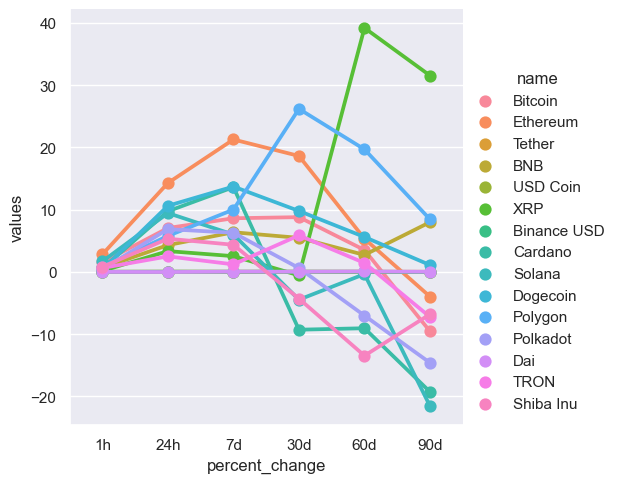

In [168]:
# Some visualization based on our data pulls to get an idea

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
plt.show(2)

In [180]:
# Creating a dataframe with whatever columns we want

df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8



,name,quote.USD.price,timestamp
0,Bitcoin,20616.15466,2022-10-26 17:53:03.049953
0,Bitcoin,20894.26910,2022-10-26 17:53:25.002252
0,Bitcoin,20894.26910,2022-10-26 17:54:25.284579
0,Bitcoin,20879.59691,2022-10-26 17:55:25.937624
0,Bitcoin,20864.92123,2022-10-26 17:56:26.561015
0,Bitcoin,20862.30448,2022-10-26 17:57:29.559846
0,Bitcoin,20857.54303,2022-10-26 17:58:30.191300
0,Bitcoin,20828.67579,2022-10-26 17:59:30.486075


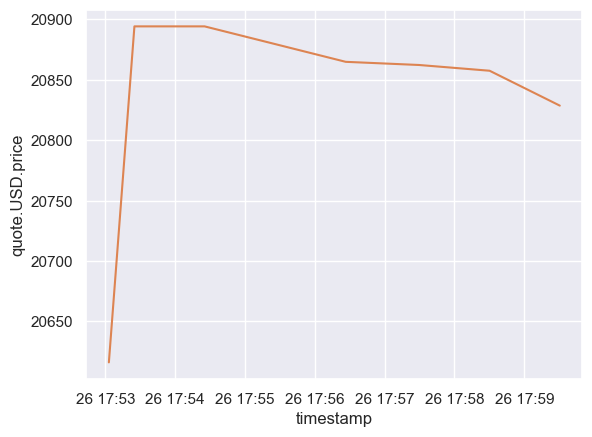

In [179]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)
plt.show()

In [181]:
df8.reset_index(inplace=True, drop=True) #troubleshooting duplicate values